<div class="task">
        <h2>Problem 1 - Data Read, Write, and Inspect</h2>
        <p><strong>Dataset:</strong> <code>bank.csv</code></p>
        <ul>
            <li>Load the provided dataset and import it into a Pandas DataFrame.</li>
            <li>Check the information of the DataFrame and identify the following:
                <ul>
                    <li>Columns with <code>dtypes=object</code></li>
                    <li>Unique values of those columns</li>
                    <li>Total number of null values in each column</li>
                </ul>
            </li>
            <li>Drop all the columns with <code>dtypes=object</code>, store in a new DataFrame, and write to a CSV named <code>banknumericdata.csv</code>.</li>
            <li>Read <code>banknumericdata.csv</code> and find the summary statistics.</li>
        </ul>
    </div>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
bank_path = '/content/drive/MyDrive/Concepts and Technology of AI/bank.csv'
bank_data = pd.read_csv(bank_path)

# 1. Check info of the DataFrame
print("\nData informarion: ",bank_data.info())

# 2a. Columns with dtype=object
object_columns = bank_data.select_dtypes(include='object').columns
print("\nObject Columns:", object_columns)

# 2b. Unique values of those columns
for col in object_columns:
    print(f"\nUnique values in column {col}:", bank_data[col].unique())

# 2c. Total number of null values in each column
print("\nNull values in each column:", bank_data.isnull().sum())

# 3. Drop columns with dtype=object and save as new DataFrame
bank_numeric = bank_data.select_dtypes(exclude='object')
bank_numeric.to_csv(bank_path, index=False)

# 4. Read the new CSV and find summary statistics
bank_numeric = pd.read_csv(bank_path)
print(bank_numeric.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB

Data informarion:  None

Object Columns: Index([], dtype='object')

Null values in each column: age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098

<h2>Problem 2 - Data Imputations</h2>
        <p><strong>Dataset:</strong> <code>medical_students.csv</code></p>
        <ul>
            <li>Load the provided dataset and import it into a Pandas DataFrame.</li>
            <li>Check the information of the DataFrame and identify columns with missing (<code>null</code>) values.</li>
            <li>For columns with missing values, fill the values using various techniques. Explain why you selected a particular method for each column.</li>
            <li>Check for any duplicate values in the dataset and manage them appropriately. {Hint: <code>dataset.duplicated.sum()</code>}</li>
        </ul>

In [18]:
medical_std_path = '/content/drive/MyDrive/Concepts and Technology of AI/medical_students_dataset.csv'
medical_data = pd.read_csv(medical_std_path)

# 1. Check info of the DataFrame
print("\nData Information: ", medical_data.info())

# 2. Identify column(s) with missing values
missing_values = medical_data.isnull().sum()
print("\nColumns with missing values:\n", missing_values[missing_values > 0])

# 3. Fill missing values
for col in medical_data.columns:
    if medical_data[col].dtype == 'object':
        medical_data[col].fillna(medical_data[col].mode()[0], inplace=True)
    else:
        medical_data[col].fillna(medical_data[col].mean(), inplace=True)

print("\nMissing values after imputation are:\n", medical_data.isnull().sum())

# 4. Check for duplicate values
duplicates = medical_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

medical_data = medical_data.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Data Information:  None

Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            

<ipython-input-18-f50e0ccc6b60>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_data[col].fillna(medical_data[col].mean(), inplace=True)
<ipython-input-18-f50e0ccc6b60>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


Number of duplicate rows: 12572


<h2>3.2 Exercises - Data Cleaning and Transformations with Titanic Dataset</h2>
<p><strong>Dataset:</strong> <code>titanic.csv</code></p>

  <h3>Problem 1:</h3>
    <ul>
    <li>Create a DataFrame subset with columns <code>Name</code>, <code>Pclass</code>, <code>Sex</code>, <code>Age</code>, <code>Fare</code>, and <code>Survived</code>.</li>
    <li>Retain rows where <code>Pclass</code> equals 1 (First-Class passengers).</li>
    <li>Calculate the mean, median, maximum, and minimum values of the <code>Fare</code> column.<li>
    </ul>

  <h3>Problem 2:</h3>
    <ul>
            <li>Count the number of <code>null</code> values in the <code>Age</code> column of the subset DataFrame from Problem 1.</li>
            <li>Drop rows with <code>null</code> values in the <code>Age</code> column.</li>
        </ul>

  <h3>Problem 3:</h3>
        <ul>
            <li>Use one-hot encoding to convert the <code>Embarked</code> column into binary columns (<code>Embarked_C</code>, <code>Embarked_Q</code>, <code>Embarked_S</code>).</li>
            <li>Add these new columns to the original DataFrame.</li>
            <li>Drop the original <code>Embarked</code> column.</li>
            <li>Print the first few rows of the modified DataFrame to verify changes.</li>
        </ul>

  <h3>Problem 4:</h3>
        <ul>
            <li>Compare the mean survival rates (<code>Survived</code>) for different groups in the <code>Sex</code> column.</li>
            <li>Visualize survival distributions by gender using a plotting library.</li>
        </ul>

In [24]:
titanic_path = '/content/drive/MyDrive/Concepts and Technology of AI/Titanic-Dataset.csv'
titanic_data = pd.read_csv(titanic_path)


Fare Statistics:
{'Mean': 87.96158225806451, 'Median': 69.3, 'Max': 512.3292, 'Min': 0.0}


Null values in Age column: 30
Column 'Embarked' is not present in the DataFrame.
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




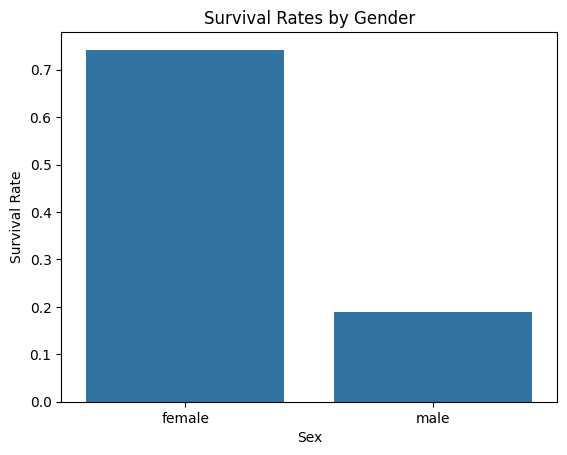



Column 'Embarked' is not present in the DataFrame.


In [44]:
# Problem 1
subset_data = titanic_data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_data = subset_data[subset_data['Pclass'] == 1]

fare_stats = {
    "Mean": first_class_df['Fare'].mean(),
    "Median": first_class_df['Fare'].median(),
    "Max": first_class_df['Fare'].max(),
    "Min": first_class_df['Fare'].min()
}
print(f"\nFare Statistics:\n{fare_stats}")

# Problem 2
null_age_count = first_class_data['Age'].isnull().sum()
print(f"\n\nNull values in Age column: {null_age_count}")
first_class_data = first_class_data.dropna(subset=['Age'])

# Problem 3
if 'Embarked' in titanic_data.columns:
    embarked_dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
    titanic_data = pd.concat([titanic_data, embarked_dummies], axis=1)

    # Drop original Embarked column
    titanic_data.drop(columns=['Embarked'], inplace=True)
    print(titanic_data.head())
else:
    print("Column 'Embarked' is not present in the DataFrame.")


#Problem 4
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print(gender_survival)
print("\n")
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()


#Problem 5
if 'Embarked' in titanic_data.columns:
    embarked_survival = titanic_data.groupby('Embarked')['Survived'].mean()
    print(embarked_survival)

    sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
    plt.title('Survival Rates by Embarkation Port')
    plt.ylabel('Survival Rate')
    plt.xlabel('Embarkation Port')
    plt.show()
else:
    print("\n\nColumn 'Embarked' is not present in the DataFrame.")
